In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# creating dataset
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

In [3]:
# callback to stop training when validation accuracy is 100%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        try:
            if logs.get('val_accuracy') == 1.0:
                print("\nReached 100% accuracy, stopping training")
                self.model.stop_training = True
        except:
            pass
        return

callbacks = myCallback()

In [10]:
# creating tensorflow model
model = tf.keras.models.Sequential([
        # input layer
        tf.keras.layers.Dense(2, input_shape = (2,), activation='relu'),
        # hidden layer
        tf.keras.layers.Dense(4, activation='relu'),
        # output neuron
        tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [12]:
# training the model
tf.random.set_seed(17)
history = model.fit(
        x, y,
        epochs = 150,
        validation_data = (x, y),
        callbacks = [callbacks]
        )

Epoch 1/150
1/1 [==============================] - 0s 125ms/step - loss: 0.6974 - accuracy: 0.5000 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 2/150
1/1 [==============================] - 0s 20ms/step - loss: 0.6965 - accuracy: 0.5000 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 3/150
1/1 [==============================] - 0s 19ms/step - loss: 0.6960 - accuracy: 0.5000 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 4/150
1/1 [==============================] - 0s 19ms/step - loss: 0.6957 - accuracy: 0.5000 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 5/150
1/1 [==============================] - 0s 19ms/step - loss: 0.6954 - accuracy: 0.5000 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 6/150
1/1 [==============================] - 0s 20ms/step - loss: 0.6951 - accuracy: 0.5000 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 7/150
1/1 [==============================] - 0s 20ms/step - loss: 0.6949 - accuracy: 0.5000 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 8/150
1/1 [==

In [ ]:
# Note: because of very small train set, the train_set = validation_set = test_set

# Training is stopped when validation accuracy is 100% because
# there are only 4 test cases and there can not be 'high variance'

# stats of the model are given below

In [13]:
print(f"Loss : {model.evaluate(x,y)[0]}")
print(f"Accuracy % : {model.evaluate(x,y)[1]*100}")

1/1 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 1.0000
Loss : 0.6869449019432068
1/1 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 1.0000
Accuracy % : 100.0


In [18]:
predictions = model.predict_classes(x)
predictions = predictions.reshape(1,-1)[0]

# confusion matrix
print('Confusion Matrix:\n', confusion_matrix(y, predictions), sep='')
print(f'Accuracy Score: {accuracy_score(y, predictions)*100}%')

Confusion Matrix:
[[2 0]
 [0 2]]
Accuracy Score: 100.0%


In [24]:
# verifying outputs manually
for i in range(len(x)):
    print(f'{x[i]}\t\t{predictions[i]}')

[0 0]		0
[0 1]		1
[1 0]		1
[1 1]		0


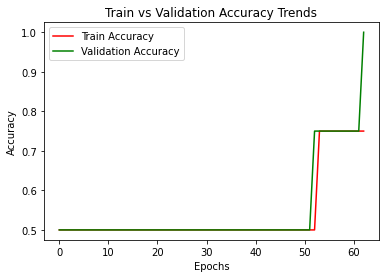

In [22]:
# train and validation accuracy trends
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = [i for i in range(0, 63)]
plt.plot(epochs, train_accuracy, 'r', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation Accuracy')
plt.title('Train vs Validation Accuracy Trends')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
# saving the model
model.save('./model.h5', save_format='h5')

In [28]:
# verifying saved model
model = tf.keras.models.load_model('./model.h5')
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________
